In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'D:/work/pythonPractice/big projects/Blitzkrieg'
df = pd.read_csv(path + '/Datasets/Tree_case_data.csv')
df.shape

(7044, 18)

In [3]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Plan,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,1,0,1,0,1,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,3,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,3,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,5,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7044 non-null   int64  
 1   Senior_Citizen     7044 non-null   int64  
 2   Partner            7044 non-null   int64  
 3   Dependents         7044 non-null   int64  
 4   tenure             7044 non-null   int64  
 5   Plan               7044 non-null   int64  
 6   Online_Security    7044 non-null   int64  
 7   Online_Backup      7044 non-null   int64  
 8   Device_Protection  7044 non-null   int64  
 9   Tech_Support       7044 non-null   int64  
 10  Streaming_TV       7044 non-null   int64  
 11  Streaming_Movies   7044 non-null   int64  
 12  Contract           7044 non-null   int64  
 13  Paperless_Billing  7044 non-null   int64  
 14  Payment_Method     7044 non-null   int64  
 15  Monthly_Charges    7044 non-null   float64
 16  Total_Charges      7044 

<AxesSubplot:>

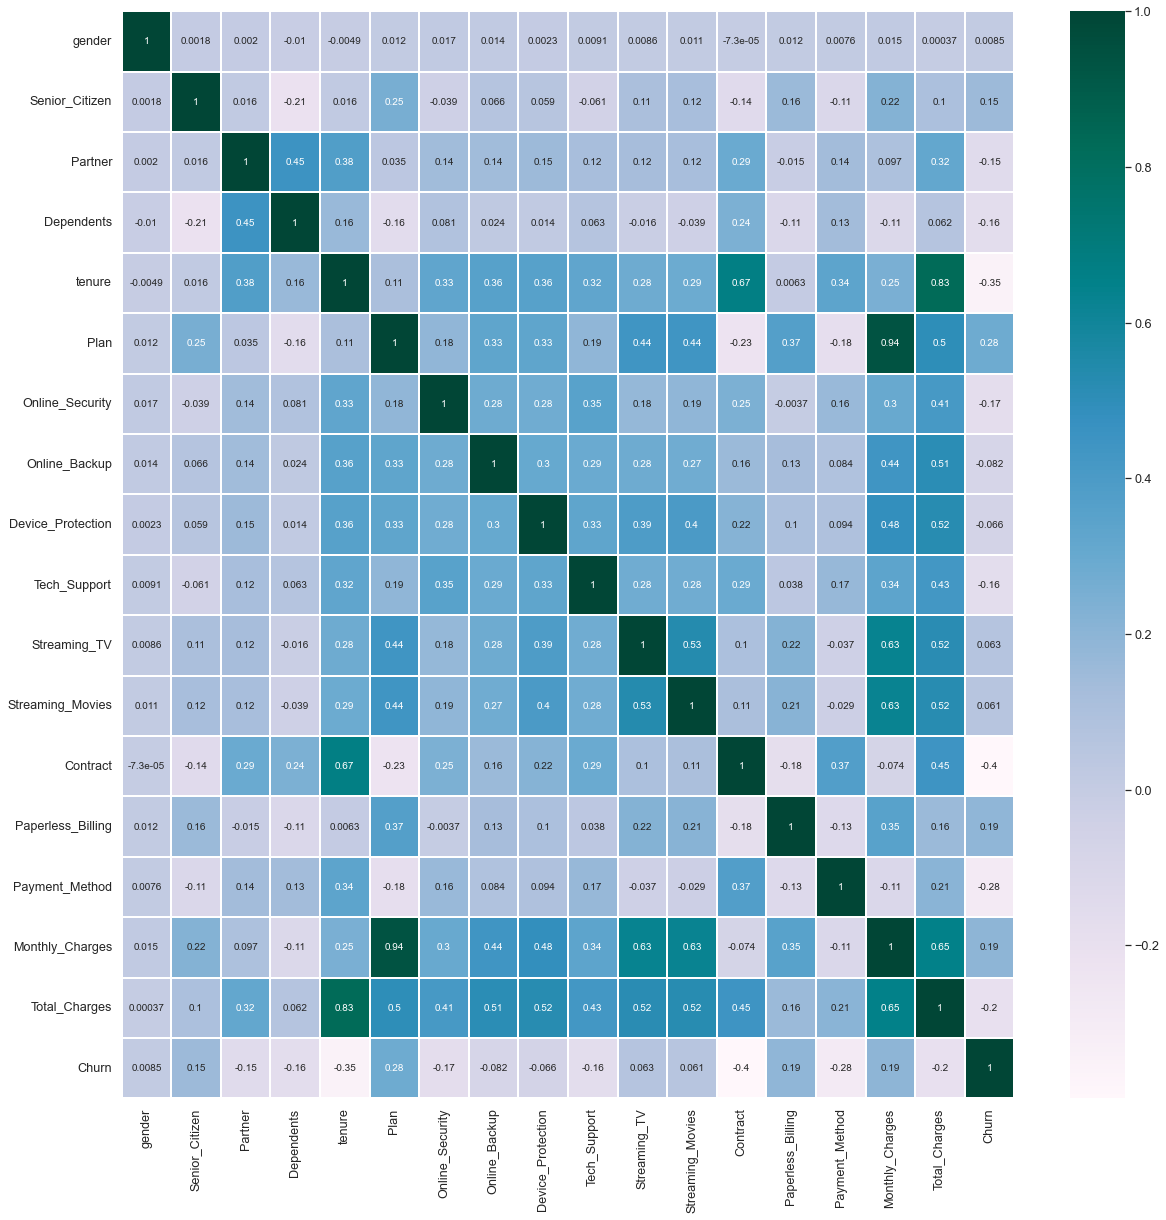

In [5]:
temp = df.corr()
top_corr_features = temp.index
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(df[top_corr_features].corr(),annot = True, cmap = "PuBuGn",linewidths=0.1,linecolor='white',annot_kws={'size': 10})

In [5]:
xg = xgb.XGBClassifier(n_estimators = 400,max_depth =6,eval_metric='logloss') 
d_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 69)
d_gini = DecisionTreeClassifier(criterion = "gini",random_state = 69)
regressor = RandomForestClassifier(n_estimators = 400, max_depth =6, random_state = 69)

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)
    return plt

In [7]:
def dectree(X_train,y_train,X_test, y_test):
    d_gini.fit(X_train, y_train) 
    d_entropy.fit(X_train, y_train)
    y_gini = d_gini.predict(X_test)
    y_entropy = d_entropy.predict(X_test)
    print("DECISION TREE\n")
    print("Gini algo")
    print(confusion_matrix(y_test, y_gini)) 
    print("\nAccuracy",accuracy_score(y_test,y_gini)*100,"\n")
    print(classification_report(y_test,y_gini))
    viz = plot_roc_curve(d_gini, X_test, y_test,name='ROC fold GINI',alpha=0.3, lw=1, ax=ax, color='y')    
    print("======\n")
    print("Entropy Algo")
    print(confusion_matrix(y_test, y_entropy))
    print("\nAccuracy",accuracy_score(y_test,y_entropy)*100,"\n")
    print(classification_report(y_test,y_entropy))
    viz = plot_roc_curve(d_entropy, X_test, y_test,name='ROC fold Entropy',alpha=0.3, lw=1, ax=ax, color='g')    
    print("==========================================\n\n")

In [8]:
def ranfor(X_train,y_train,X_test, y_test):
    regressor.fit(X_train, y_train) 
    y_pred = regressor.predict(X_test)
    y_pred = pd.DataFrame(y_pred)
    print("RANDOM FOREST\n")
    print(confusion_matrix(y_test, y_pred))
    acc = cross_val_score(estimator= regressor, X= X_train, y = y_train, cv =7)
    print(acc.mean(),acc.std())
    print(classification_report(y_test,y_pred))
    print("===========================================\n\n")
    viz = plot_roc_curve(regressor, X_test, y_test,name='ROC fold RanFor',alpha=0.5, lw=1, ax=ax, color='y')    

In [9]:
def xgbo(X_train,y_train,X_test, y_test):
    xg.fit(X_train, y_train) 
    y_pred = xg.predict(X_test)
    y_pred = pd.DataFrame(y_pred)
    print("XGBoost\n")
    print(confusion_matrix(y_test, y_pred))
    acc = cross_val_score(estimator= xg, X= X_train, y = y_train, cv =7)
    print(acc.mean(),acc.std())
    print(classification_report(y_test,y_pred))
    print("==========================================\n\n")
    viz = plot_roc_curve(xg, X_test, y_test,name='ROC fold XGB',alpha=0.5, lw=1, ax=ax, color='g')    

## CASE-1: Base Case 

DECISION TREE

Gini algo
[[865 192]
 [175 177]]

Accuracy 73.95315826827537 

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1057
           1       0.48      0.50      0.49       352

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409


Entropy Algo
[[857 200]
 [171 181]]

Accuracy 73.66926898509581 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1057
           1       0.48      0.51      0.49       352

    accuracy                           0.74      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



RANDOM FOREST

[[964  93]
 [164 188]]
0.8008873114463178 0.011704441844075363
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1057
           1

<module 'matplotlib.pyplot' from 'd:\\work\\pythonpractice\\big projects\\ml setup\\mlenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

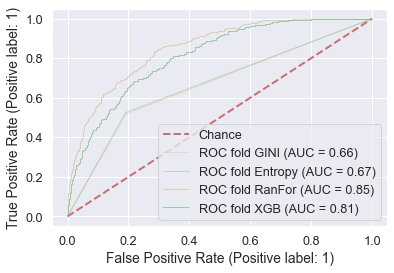

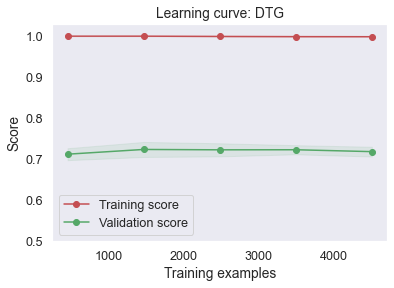

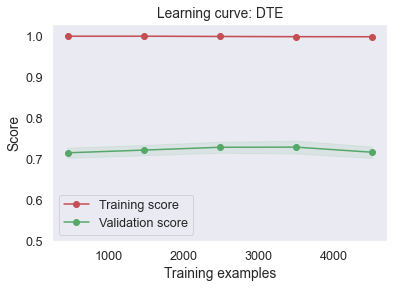

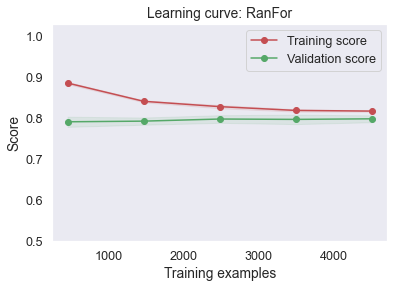

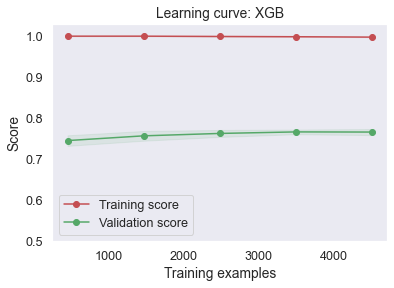

In [11]:
df1 = df.copy()
X = df1.iloc[:,:len(df1.columns)-1]
y = df1.iloc[:,len(df1.columns)-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
dectree(X_train,y_train,X_test, y_test)
ranfor(X_train,y_train,X_test, y_test)
xgbo(X_train,y_train,X_test, y_test)

plot_learning_curve(d_gini,"Learning curve: DTG",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(d_entropy,"Learning curve: DTE",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(regressor,"Learning curve: RanFor",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(xg,"Learning curve: XGB",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)

## CASE-2: Adding number of features column 

In [10]:
df2 = df.copy()
feature_no = []
for x in range(7044):
    feature_no.append(df['Online_Security'][x] + df['Online_Backup'][x] + df['Device_Protection'][x]+ df['Tech_Support'][x]+ df['Streaming_TV'][x]+ df['Streaming_Movies'][x])
    
df2.insert(6,'Feature_no',feature_no)
del df2['Online_Security']
del df2['Online_Backup']
del df2['Device_Protection']
del df2['Tech_Support']
del df2['Streaming_TV']
del df2['Streaming_Movies']
df2.head()


,gender,Senior_Citizen,Partner,Dependents,tenure,Plan,Feature_no,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,1,0,1,0,1,2,1,0,1,0,29.85,29.85,0
1,0,0,0,0,34,3,2,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,3,2,0,1,1,53.85,108.15,1
3,0,0,0,0,45,2,3,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,5,0,0,1,0,70.70,151.65,1


<AxesSubplot:>

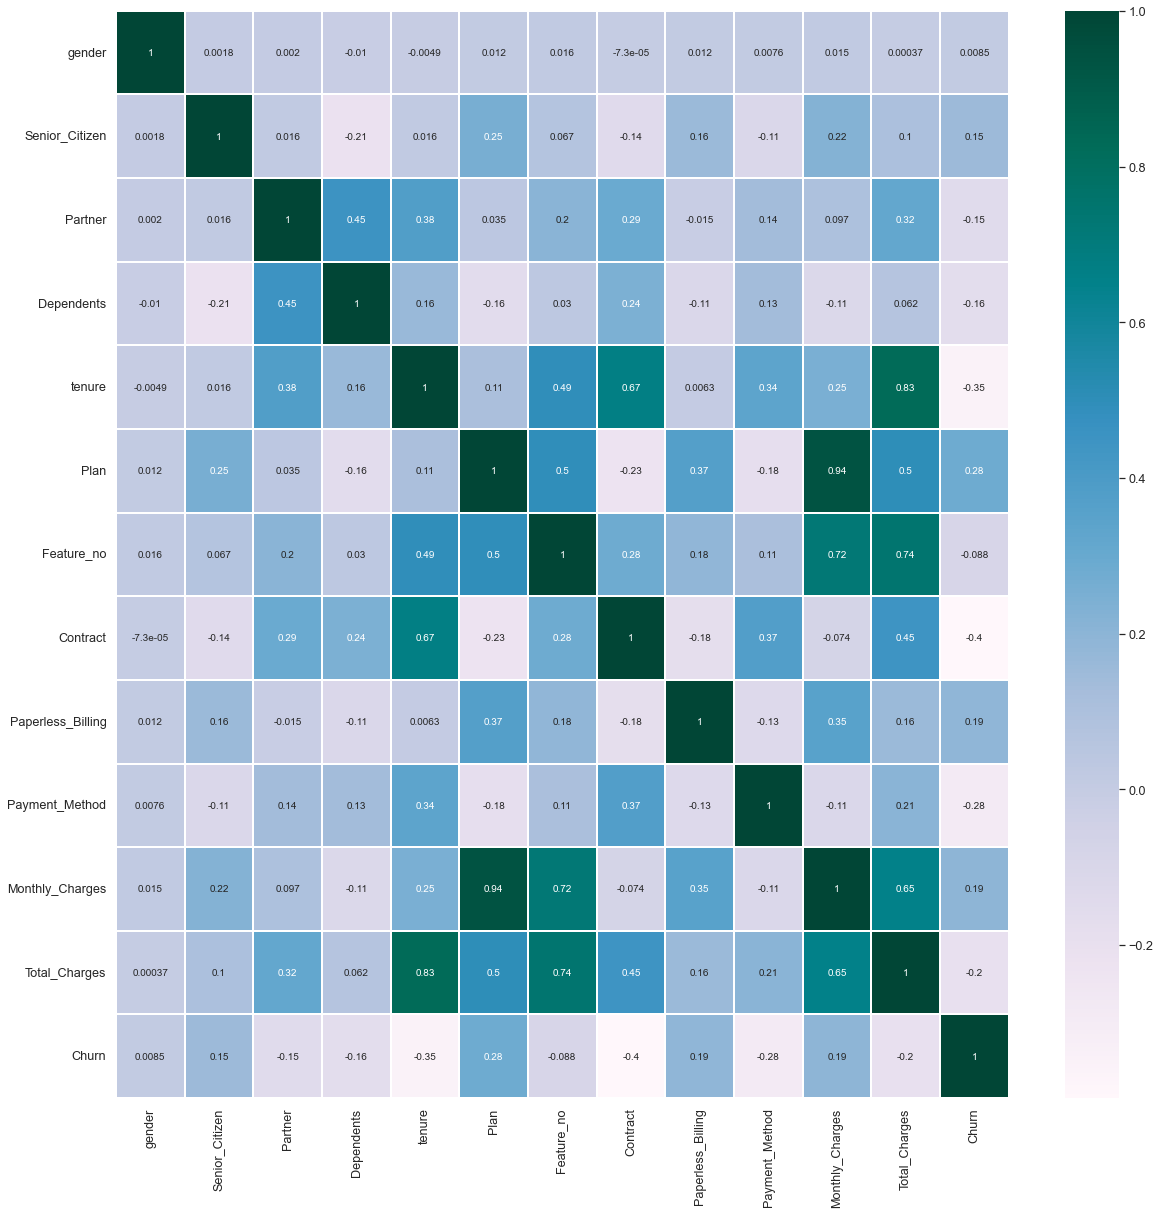

In [13]:
temp = df2.corr()
top_corr_features = temp.index
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(df2[top_corr_features].corr(),annot = True, cmap = "PuBuGn",linewidths=0.1,linecolor='white',annot_kws={'size': 10})

DECISION TREE

Gini algo
[[873 184]
 [185 167]]

Accuracy 73.81121362668559 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1057
           1       0.48      0.47      0.48       352

    accuracy                           0.74      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.74      0.74      0.74      1409


Entropy Algo
[[861 196]
 [185 167]]

Accuracy 72.95954577714691 

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1057
           1       0.46      0.47      0.47       352

    accuracy                           0.73      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.73      0.73      0.73      1409



RANDOM FOREST

[[954 103]
 [166 186]]
0.7959183673469388 0.010280566713725113
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1057
           1

<module 'matplotlib.pyplot' from 'd:\\work\\pythonpractice\\big projects\\ml setup\\mlenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

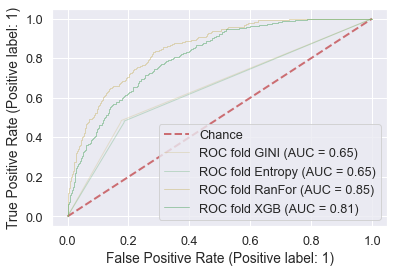

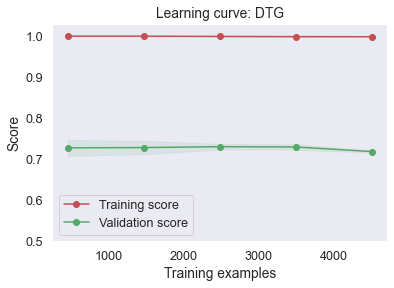

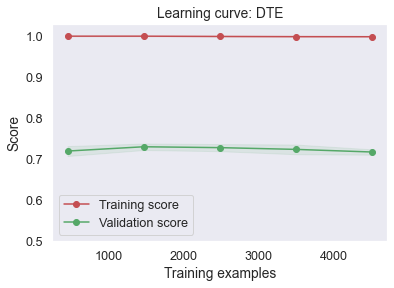

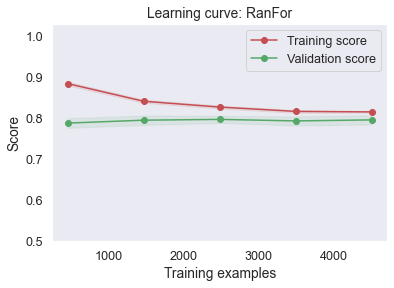

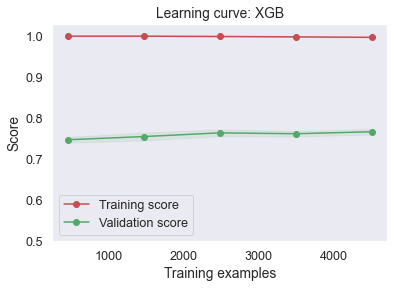

In [14]:
X = df2.iloc[:,:len(df2.columns)-1]
y = df2.iloc[:,len(df2.columns)-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
dectree(X_train,y_train,X_test, y_test)
ranfor(X_train,y_train,X_test, y_test)
xgbo(X_train,y_train,X_test, y_test)

plot_learning_curve(d_gini,"Learning curve: DTG",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(d_entropy,"Learning curve: DTE",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(regressor,"Learning curve: RanFor",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(xg,"Learning curve: XGB",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)

## CASE-3: Dropping monthly and total charges charges 

In [15]:
df3 = df.copy()
del df3['Monthly_Charges']
del df3['Total_Charges']
df3.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Plan,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Churn
0,1,0,1,0,1,2,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,34,3,1,0,1,0,0,0,1,0,1,0
2,0,0,0,0,2,3,1,1,0,0,0,0,0,1,1,1
3,0,0,0,0,45,2,1,0,1,1,0,0,1,0,2,0
4,1,0,0,0,2,5,0,0,0,0,0,0,0,1,0,1


DECISION TREE

Gini algo
[[862 195]
 [176 176]]

Accuracy 73.66926898509581 

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1057
           1       0.47      0.50      0.49       352

    accuracy                           0.74      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.74      0.74      1409


Entropy Algo
[[868 189]
 [168 184]]

Accuracy 74.66288147622427 

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1057
           1       0.49      0.52      0.51       352

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



RANDOM FOREST

[[979  78]
 [183 169]]
0.7960958296362024 0.01014488442090964
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1057
           1 

<module 'matplotlib.pyplot' from 'd:\\work\\pythonpractice\\big projects\\ml setup\\mlenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

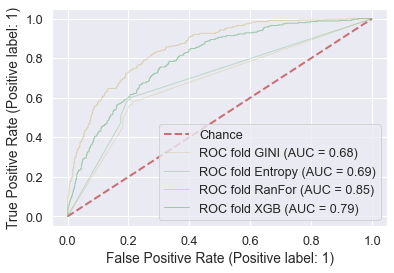

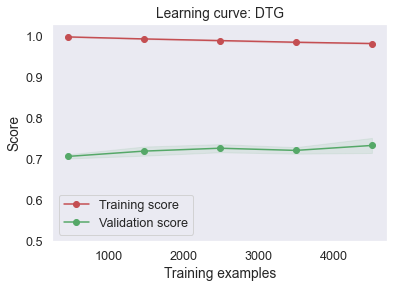

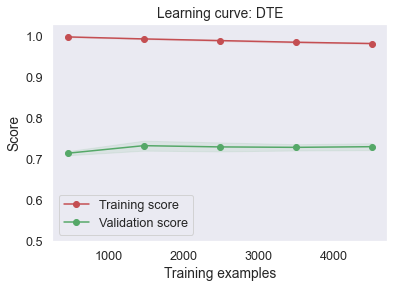

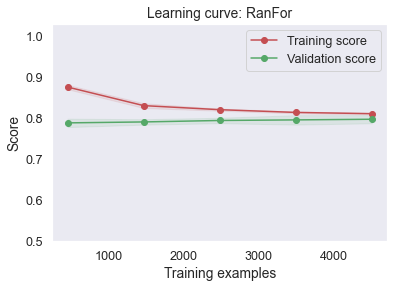

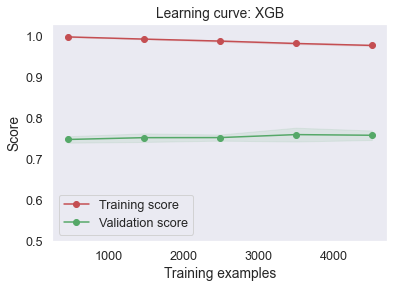

In [16]:
X = df3.iloc[:,:len(df3.columns)-1]
y = df3.iloc[:,len(df3.columns)-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
dectree(X_train,y_train,X_test, y_test)
ranfor(X_train,y_train,X_test, y_test)
xgbo(X_train,y_train,X_test, y_test)

plot_learning_curve(d_gini,"Learning curve: DTG",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(d_entropy,"Learning curve: DTE",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(regressor,"Learning curve: RanFor",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(xg,"Learning curve: XGB",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)

## CASE-4: Removing gender

In [18]:
df4 = df.copy()
del df4['gender']
df4.head()

,Senior_Citizen,Partner,Dependents,tenure,Plan,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,0,1,0,1,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,34,3,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,2,3,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,45,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,2,5,0,0,0,0,0,0,0,1,0,70.70,151.65,1


DECISION TREE

Gini algo
[[863 194]
 [178 174]]

Accuracy 73.59829666430092 

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1057
           1       0.47      0.49      0.48       352

    accuracy                           0.74      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.74      0.74      1409


Entropy Algo
[[861 196]
 [177 175]]

Accuracy 73.52732434350602 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1057
           1       0.47      0.50      0.48       352

    accuracy                           0.74      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.74      0.74      1409



RANDOM FOREST

[[964  93]
 [163 189]]
0.7998225377107365 0.01183022772848195
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1057
           1 

<module 'matplotlib.pyplot' from 'd:\\work\\pythonpractice\\big projects\\ml setup\\mlenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

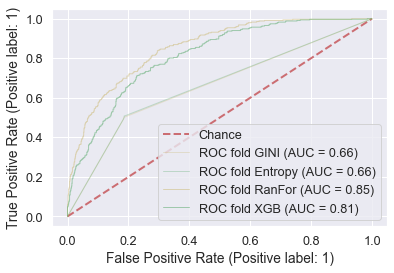

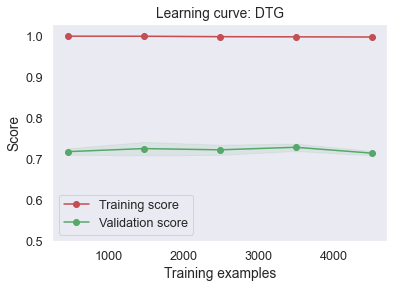

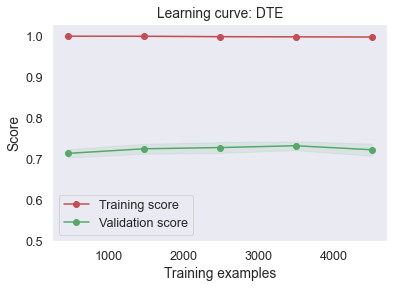

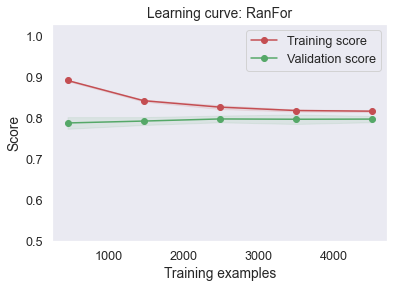

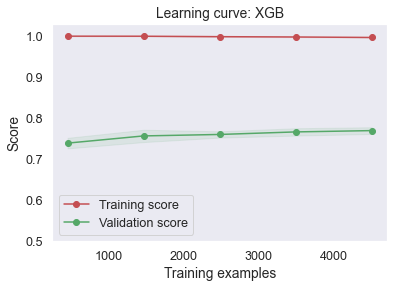

In [19]:
X = df4.iloc[:,:len(df4.columns)-1]
y = df4.iloc[:,len(df4.columns)-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
dectree(X_train,y_train,X_test, y_test)
ranfor(X_train,y_train,X_test, y_test)
xgbo(X_train,y_train,X_test, y_test)

plot_learning_curve(d_gini,"Learning curve: DTG",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(d_entropy,"Learning curve: DTE",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(regressor,"Learning curve: RanFor",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(xg,"Learning curve: XGB",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)

## CASE-5: Adding Family type column

In [20]:
df5 = df.copy()
family = []
for x in range(7044):
    #     only 1 member
    if df['Dependents'][x] == 0 and df['Partner'][x] == 0:
        family.append(0)
    #     3+ members
    elif df['Dependents'][x] == 1 and df['Partner'][x] == 1:
        family.append(3)
    #     2+ members
    elif df['Dependents'][x] == 1 and df['Partner'][x] == 0:
        family.append(2)
    #     2 members
    else:
        family.append(1)
    
df5.insert(2,'family',family)
del df5['Dependents']
del df5['Partner']
df5.head()


,gender,Senior_Citizen,family,tenure,Plan,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,1,0,1,1,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,34,3,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,2,3,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,45,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,2,5,0,0,0,0,0,0,0,1,0,70.70,151.65,1


<AxesSubplot:>

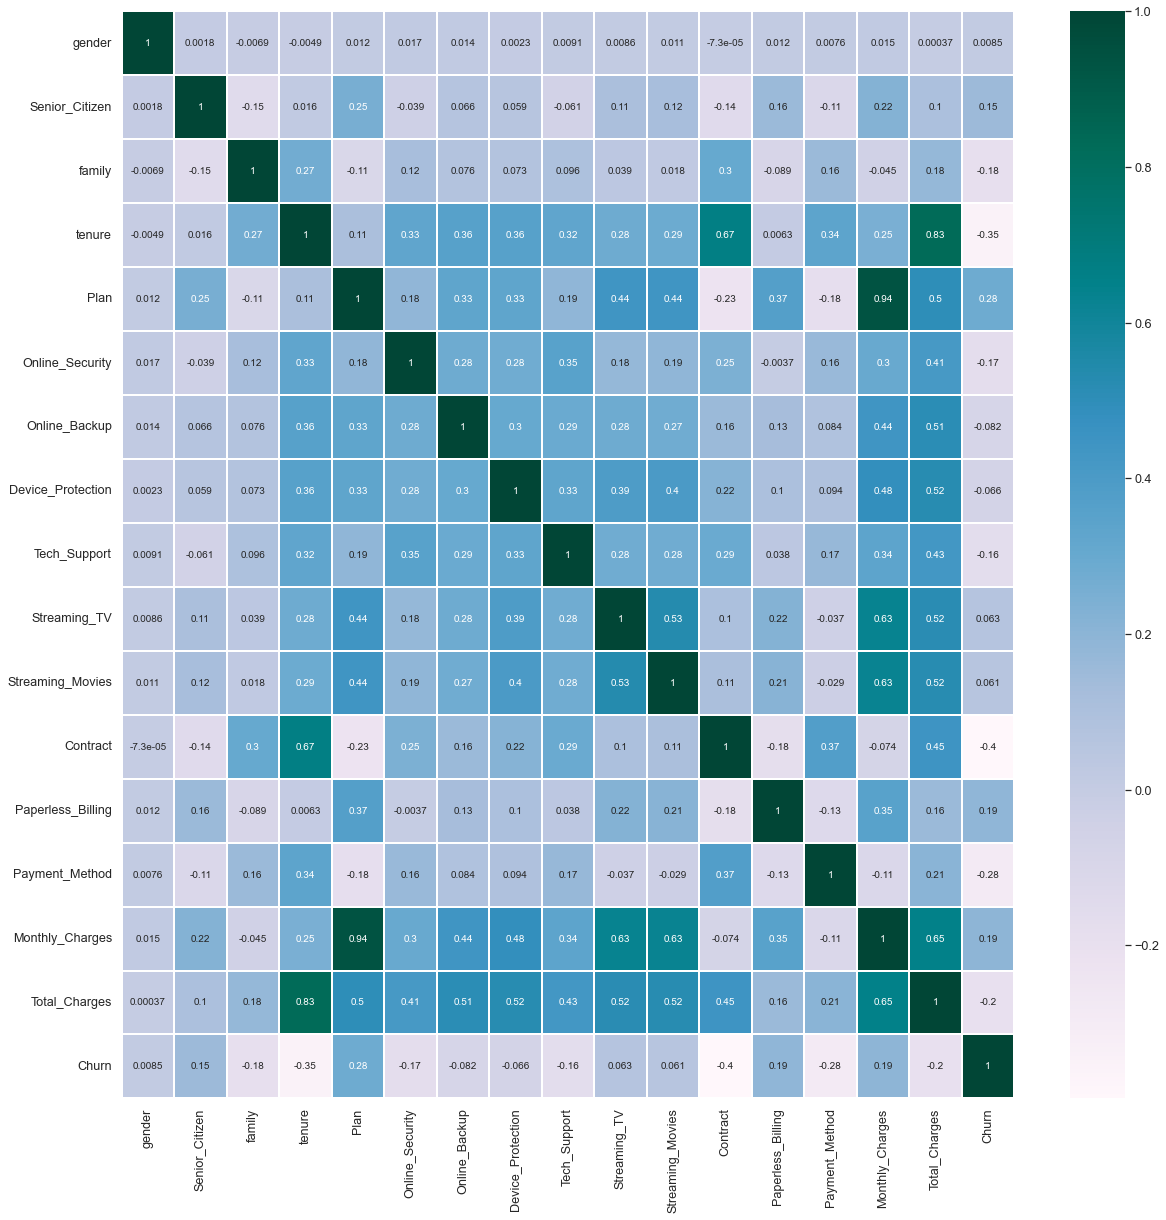

In [22]:
temp = df5.corr()
top_corr_features = temp.index
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(df5[top_corr_features].corr(),annot = True, cmap = "PuBuGn",linewidths=0.1,linecolor='white',annot_kws={'size': 10})

DECISION TREE

Gini algo
[[859 198]
 [178 174]]

Accuracy 73.31440738112136 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1057
           1       0.47      0.49      0.48       352

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.74      0.73      0.74      1409


Entropy Algo
[[858 199]
 [179 173]]

Accuracy 73.17246273953158 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1057
           1       0.47      0.49      0.48       352

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.74      0.73      0.73      1409



RANDOM FOREST

[[965  92]
 [162 190]]
0.7998225377107364 0.012106518474399678
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1057
           1

<module 'matplotlib.pyplot' from 'd:\\work\\pythonpractice\\big projects\\ml setup\\mlenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

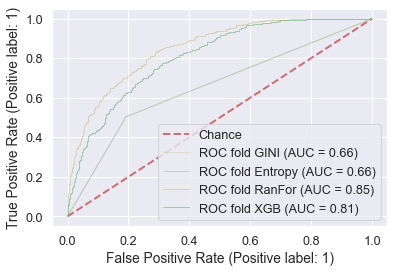

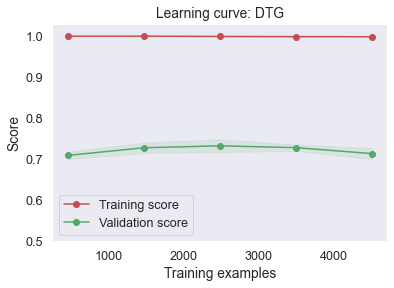

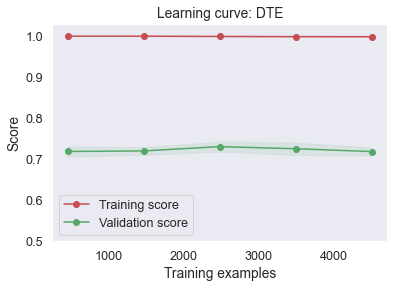

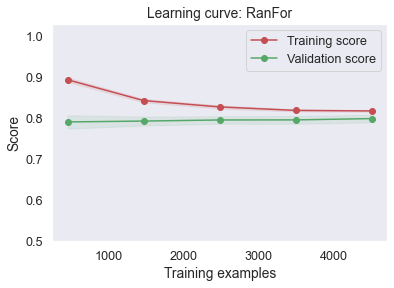

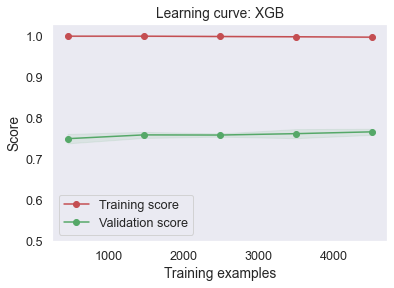

In [21]:
X = df5.iloc[:,:len(df5.columns)-1]
y = df5.iloc[:,len(df5.columns)-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
dectree(X_train,y_train,X_test, y_test)
ranfor(X_train,y_train,X_test, y_test)
xgbo(X_train,y_train,X_test, y_test)

plot_learning_curve(d_gini,"Learning curve: DTG",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(d_entropy,"Learning curve: DTE",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(regressor,"Learning curve: RanFor",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)
plot_learning_curve(xg,"Learning curve: XGB",X_train,y_train,ylim=(0.5,1.03),cv= 5,n_jobs= 1)

## CASE-6: Adding Plans_completed column

In [ ]:
df5 = df.copy()
family = []
for x in range(7044):
    #     only 1 member
    if df['Dependents'][x] == 0 and df['Partner'][x] == 0:
        family.append(0)
    #     3+ members
    elif df['Dependents'][x] == 1 and df['Partner'][x] == 1:
        family.append(3)
    #     2+ members
    elif df['Dependents'][x] == 1 and df['Partner'][x] == 0:
        family.append(2)
    #     2 members
    else:
        family.append(1)
    
df5.insert(2,'family',family)
del df5['Dependents']
del df5['Partner']
df5.head()
